# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales



# Grupo 1: 
Cindy Zulima Alzate Román,
Diana Rocío Díaz Rodríguez,
Catalina Lago Martínez,
Nidia Marcela Ortíz Sandoval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('../datasets/example_retail_sales.csv')

In [5]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


# Transformación de la variable y usando np.log

In [6]:
df['y_log'] = np.log(df['y'])
df = df[['ds', 'y_log']]
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

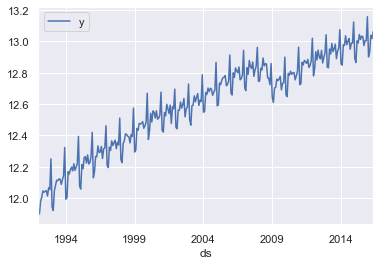

In [8]:
df.set_index('ds', inplace=True)
df.index = pd.to_datetime(df.index)
df.plot()

# Gráfica de la primera diferencia

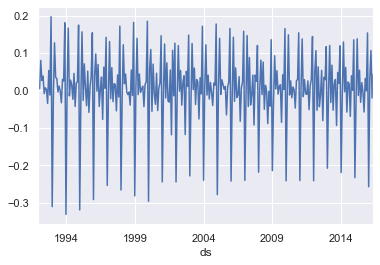

In [9]:
df['y'].diff().plot()

# Gráficos de autocorrelación  y autocorrelación parcial

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 

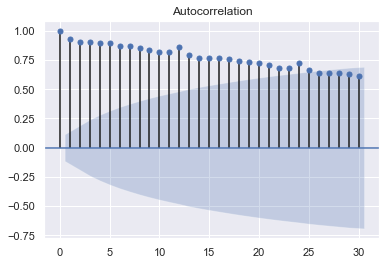

In [11]:
plot_acf(df['y'],lags=30); 

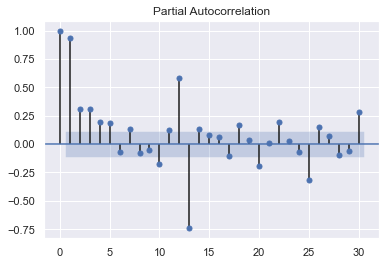

In [12]:
plot_pacf(df['y'],lags=30); 

# Ajuste de un modelo ARIMA(p,d,q) : ARIMA(12,1,0)

In [14]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  292
Model:                ARIMA(12, 1, 0)   Log Likelihood                 669.831
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sat, 20 Jun 2020   AIC                          -1311.661
Time:                        15:54:22   BIC                          -1260.187
Sample:                    02-01-1992   HQIC                         -1291.043
                         - 05-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.001      5.818      0.000       0.002       0.005
ar.L1.D.y     -0.2805      0.040     -7.043      0.000      -0.359      -0.202
ar.L2.D.y     -0.2378      0.041     -5.750      0.0

# Gráfico de los residuales 

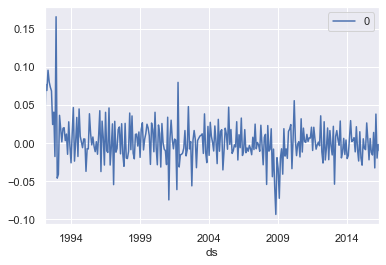

In [16]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Rolling forecast del modelo ARIMA (12,1,0)

In [25]:
X = df['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=13.072377, expected=13.075701
predicted=12.876214, expected=12.856832
predicted=12.864633, expected=12.848755
predicted=12.973029, expected=12.978045
predicted=12.943132, expected=12.974826
predicted=13.027374, expected=13.036418
predicted=12.976279, expected=12.978844
predicted=12.994553, expected=13.001336
predicted=13.030784, expected=13.019030
predicted=12.930224, expected=12.950082
predicted=12.990366, expected=12.989294
predicted=13.013026, expected=12.989769
predicted=13.113767, expected=13.124824
predicted=12.908436, expected=12.892326
predicted=12.894596, expected=12.866012


C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.005273, expected=13.003828
predicted=12.998828, expected=12.990470
predicted=13.057151, expected=13.044650
predicted=12.990768, expected=13.013060
predicted=13.023058, expected=13.033991
predicted=13.051291, expected=13.030993
predicted=12.971065, expected=12.973671
predicted=13.013367, expected=13.005737
predicted=13.017635, expected=13.004721
predicted=13.141626, expected=13.158219
predicted=12.925844, expected=12.901537
predicted=12.892363, expected=12.932543
predicted=13.046261, expected=13.039184
predicted=13.025732, expected=13.019078
predicted=13.078423, expected=13.063507


In [27]:
# se calcula el MSE
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % error)

Test MSE: 0.017


# Se ajustan varios modelos ARIMA(12, 1, j), con j = 1,2,3,4,5 

In [ ]:
order=[1,2,3,4,5]
mse=list()

for j in order:
    X = df.values
    size = int(len(X) * 0.9)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    
    print(j)

    for t in range(len(test)):
        
        model = ARIMA(history, order=(12,1,j))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
        
    mse.append(mean_squared_error(test, predictions)**0.5) 
print(mse)

# Análisis de la serie estandarizada usando Prophet

In [30]:
df = pd.read_csv('../datasets/example_retail_sales.csv')
df['y_log'] = np.log(df['y'])
df = df[['ds', 'y_log']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


In [31]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057717,13.036038,13.077943
295,2016-07-31,13.082380,13.062176,13.102491
296,2016-08-31,13.015577,12.994257,13.037169
297,2016-09-30,13.037937,13.017875,13.058401
298,2016-10-31,13.055811,13.035604,13.077942


# Se gráfica el forecast con Prophet

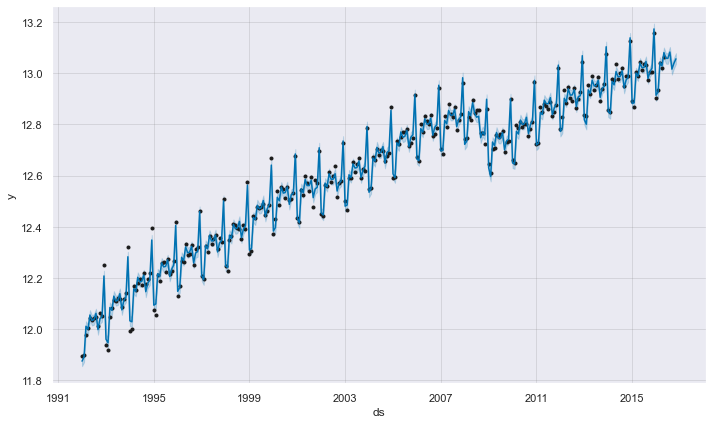

In [34]:
fig1 = m.plot(forecast)

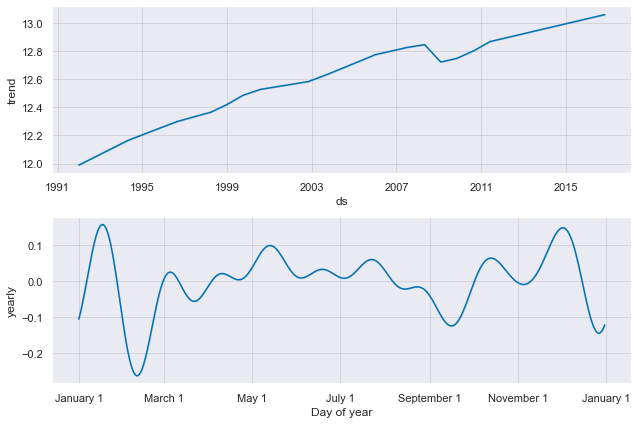

In [35]:
m.plot_components(forecast);

In [77]:
X = df['y'].values
size = int(len(X) * 0.9)
train, test = df.iloc[0:size], df.iloc[size:len(X)]

history = train
predictions = list()

for t in range(len(test)):
    m = Prophet()
    m.fit(history)
    future = m.make_future_dataframe(periods= 1, freq='M')
    forecast = m.predict(future)
    forecast['y']=forecast['yhat']
    history=history.append(forecast[['ds','y']].tail(1))
    yhat = forecast['yhat'].values[-1]
    predictions.append(yhat)
    obs = test['y'].iloc[t]
    print('predicted=%f, expected=%f' % (yhat, obs))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.127264, expected=13.075701


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.863852, expected=12.856832


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.898121, expected=12.848755


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.982015, expected=12.978045


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.974786, expected=12.974826


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.025642, expected=13.036418


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.030855, expected=12.978844


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.019227, expected=13.001336


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.052880, expected=13.019030


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.980944, expected=12.950082


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.991650, expected=12.989294


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.021595, expected=12.989769


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.175317, expected=13.124824


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.909416, expected=12.892326


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.952853, expected=12.866012


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.028770, expected=13.003828


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.021142, expected=12.990470


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.071305, expected=13.044650


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.080248, expected=13.013060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.066527, expected=13.033991


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.102496, expected=13.030993


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.029457, expected=12.973671


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.035347, expected=13.005737


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.070065, expected=13.004721


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.221701, expected=13.158219


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.954242, expected=12.901537


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.006895, expected=12.932543


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.083744, expected=13.039184


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.072716, expected=13.019078
predicted=13.124199, expected=13.063507


In [79]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test.y.values, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.002


## Conclusiones
Se obtiene un menor MSE con la serie estandarizada empleando el rolling de prophet -->Test MSE: 0.002 mientras que con el rolling forecast con ARIMA(12,1,0) se obtiene --> Test MSE: 0.017